# Пракитческое задание 1
Илья Такидзе, 772гр.

## Задача 1

###1 ячейка:
При каком h наблюдается пограничный случай в решении модельного уравнения явным методом Эйлера. Схематично изобразите решение.

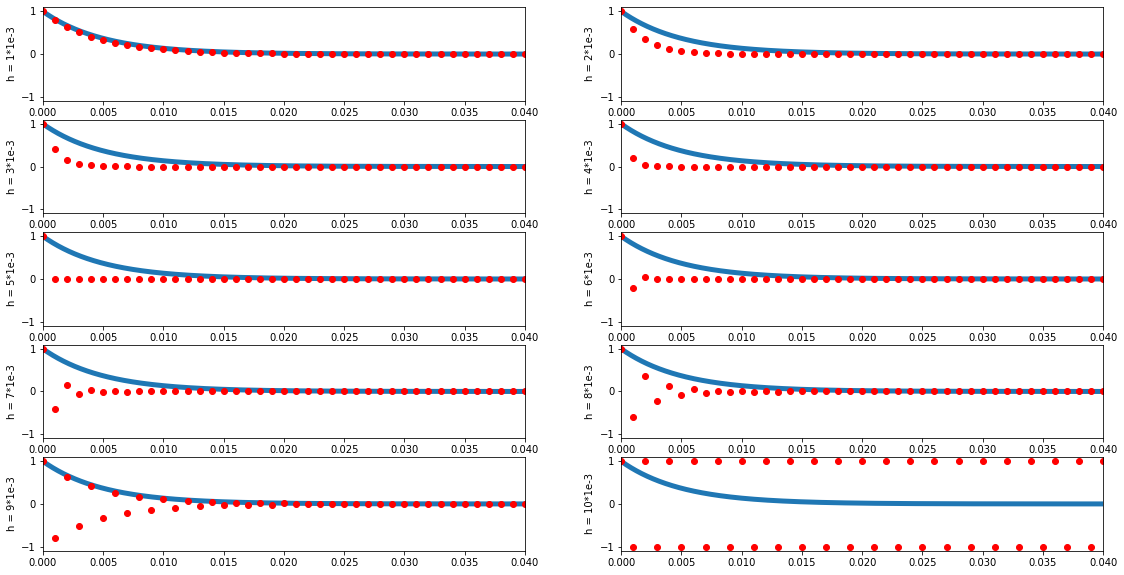

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#для модельного уравнения
#explicit Euler method
def ex_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = (1+l*h)*u[i]

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = u[i]/(1-l*h)

T = 1
h = 1e-3
N = int(T/h + 1)
x_teor = np.linspace(0,T,(N-1)*100+1) 
x = np.linspace(0,T,N)
l = -200
plt.figure(figsize=(19,10))
u = np.zeros(N)
u[0] = 1

for i in range(1, 11):
  h = i*1e-3
  #im_euler(u, l, h, N)
  ex_euler(u, l, h, N)
  plt.subplot(5, 2, i)
  plt.plot(x_teor, np.exp(l*x_teor),  x, u, 'ro', linewidth=5.0)
  plt.axis([0, 0.04, -1.1, 1.1])
  plt.ylabel("h = " + str(i) + "*1e-3")
  

На графиках видно 2 критических значения: 0.005 и 0.01. В первом случае точки ровно ложатся на ось абсцисс, во втором же расходятся на 1 и -1.

Такое же значение $h = 0.01$ можно получить аналитически из модельного уравнения $\frac{y_{i+1} - y_i}{h} = \lambda y_i$: \
$$y_{i+1} = y_i+h\lambda y_i  =>$$
т.к. $l = -200 = \lambda$
$$=> \text{метод устойчив при } h = 0.01$$


### 2 ячейка: 
Почему при возмущении начального условия (u_0 = 1.5) в задаче метод трапеции дает "пилообразное решение"?

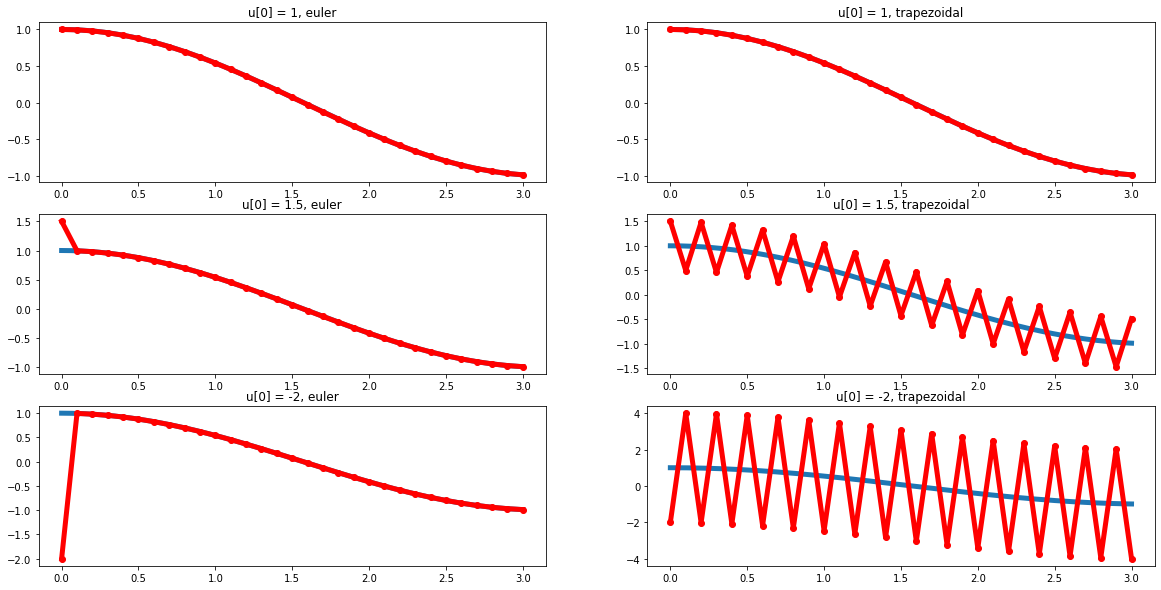

In [12]:
##### L-stability
"""
рассматриваем задачу u' = l*(u-cos(t)) - sin(t)
для начального условия u(0) = 1 решение u(t) = cos(t)
для ну u(t_0) = g решение u(t) = exp(l*(t-t_0))*(g-cos(t_0)) + cos(t)
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = u[i]/(1-l*h) - (l*h*np.cos((i+1)*h)+h*np.sin((i+1)*h))/(1-l*h)

#trapezoidal method (u^{n+1} - u^n)/h = 0.5*(f(u^n)+f(u^{n+1}))
def trapezoidal(u, l, h, N):
    for i in range(0, N-1):
        free = l*(np.cos((i+1)*h)+np.cos(i*h))+(np.sin((i+1)*h)+np.sin(i*h))
        u[i+1] = (u[i]*(1+l*h/2)-h/2*free)/(1-l*h/2)

T = 3
h = 1e-1
N = int(T/h + 1)
x_teor = np.linspace(0,T,(N-1)*100+1) 
x = np.linspace(0,T,N)
l = -1e6

u = np.zeros(N)
#initial condition
u[0] = 1
plt.figure(figsize=(19,10))

#method
im_euler(u, l, h, N)

plt.subplot(3, 2, 1)
plt.title("u[0] = 1, euler")
plt.plot(x_teor, np.cos(x_teor),  x, u, '-ro', linewidth=5.0)

trapezoidal(u, l, h, N)
plt.subplot(3,2,2)
plt.title("u[0] = 1, trapezoidal")
plt.plot(x_teor, np.cos(x_teor),  x, u, '-ro', linewidth=5.0)

u[0] = 1.5

im_euler(u, l, h, N)
plt.subplot(3, 2, 3)
plt.title("u[0] = 1.5, euler")
plt.plot(x_teor, np.cos(x_teor),  x, u, '-ro', linewidth=5.0)

trapezoidal(u, l, h, N)
plt.subplot(3,2,4)
plt.title("u[0] = 1.5, trapezoidal")
plt.plot(x_teor, np.cos(x_teor),  x, u, '-ro', linewidth=5.0)

u[0] = -2

im_euler(u, l, h, N)
plt.subplot(3, 2, 5)
plt.title("u[0] = -2, euler")
plt.plot(x_teor, np.cos(x_teor),  x, u, '-ro', linewidth=5.0)

trapezoidal(u, l, h, N)
plt.subplot(3,2,6)
plt.title("u[0] = -2, trapezoidal")
plt.plot(x_teor, np.cos(x_teor),  x, u, '-ro', linewidth=5.0)

#plt.axis([0, 0.2, -1.1, 1.1])

Вообще говоря для любого значения $u(0) \neq 1$ возникает это самое пилообразное решение. Я думаю, что проблема возникает в связи с тем, что решением является $\alpha e^{(l t)} + \cos(t)$, в котором $\alpha = 0$ только при $u(0) = 1$. 

## Задача 2

Задача X.9.22(Аристова) \
$\begin{equation*}
 \begin{cases}
   \dot{x} = x(1 - \frac{1}{2}x - \frac{2y}{7\alpha^2} )& 0\leq x_0 \leq 3,\\
   \dot{y} = y(2\alpha -3.5 \alpha^2 x -\frac{1}{2}x - \frac{1}{2}y)& 0\leq y_0 \leq 15, \\
   \dot{\alpha} = \varepsilon(2-7\alpha x)&0\leq \alpha_0 << 1, \varepsilon \leq 0.01\\
 \end{cases}
\end{equation*}$

Параметры: \
 $\varepsilon \leq 0.01, 0 \leq x_0 \leq 3, 0 \leq y_0 \leq 15, 0< \alpha_0 << 1, T_k = 1500$

Решением системы являются релаксационные колебания

In [0]:
T = 1500
h = 0.1
num_h = int(T/ h + 1)
x = np.zeros(num_h-1)
y = np.zeros_like(x)
a = np.zeros_like(x)
time = np.arange(0, T, h)
x[0] = 0.5
y[0] = 2
a[0] = 0.01
eps=0.01

In [0]:
def implicit(initial_data, time):
    x, y, a = initial_data
    xdot = x * (1 - 0.5*x-2*y / (7 * a ** 2))
    ydot = y * (2 * a - 3.5 * (a ** 2) * x - 0.5 * y)
    adot = eps *(2 - 7 * a * x)
    return xdot, ydot, adot

In [0]:
initial_data = [0.5, 3, 0.1]
res = odeint(implicit, initial_data, time)

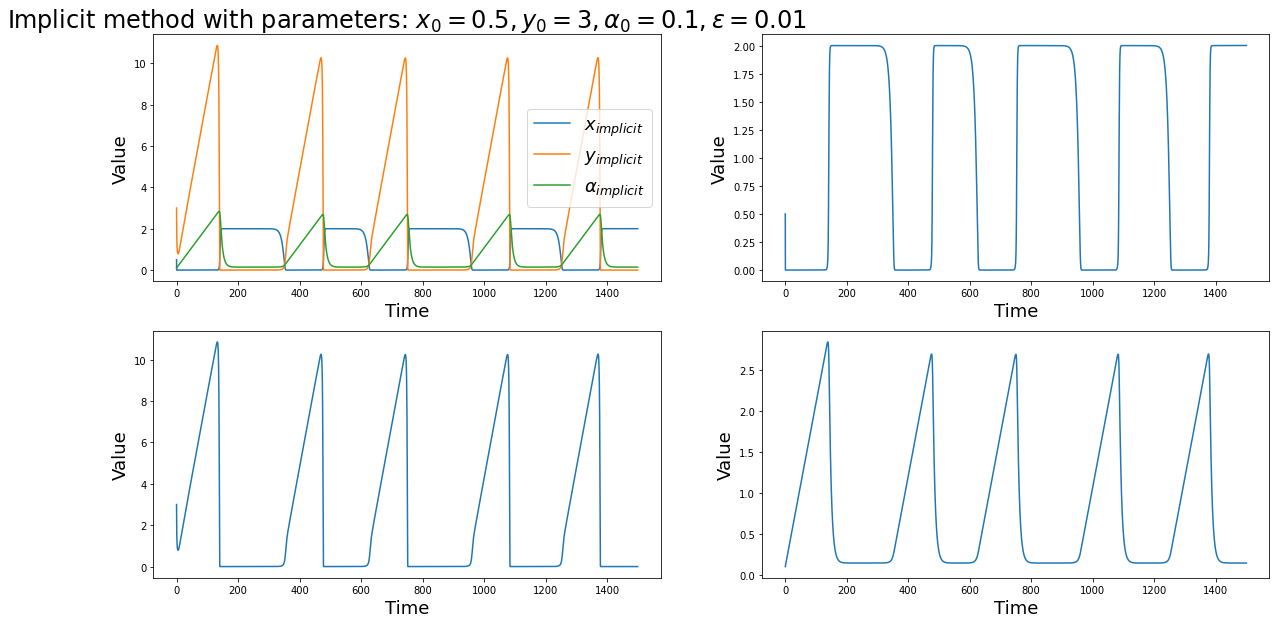

In [0]:
plt.figure(figsize=(19,10))

plt.subplot(2,2,1)
plt.plot(time, res[:, 0], label=r'$x_{implicit}$')
plt.plot(time, res[:, 1], label=r'$y_{implicit}$')
plt.plot(time, res[:, 2], label= r'$\alpha_{implicit}$')
plt.legend(loc="right", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.title(r"Implicit method with parameters: $x_0 = 0.5, y_0 = 3, \alpha_0 = 0.1, \varepsilon = 0.01$", fontsize = 24)


plt.subplot(2,2,2)
plt.plot(time, res[:, 0], label=r'$x_{implicit}$')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Value", fontsize=18)

plt.subplot(2,2,3)
plt.plot(time, res[:, 1], label=r'$y_{implicit}$')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Value", fontsize=18)

plt.subplot(2,2,4)
plt.plot(time, res[:, 2], label= r'$\alpha_{implicit}$')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Value", fontsize=18)


plt.show()

Проварьируем начальные условия x и y: изменяется только коэффициент пропорциональности графиков

In [0]:
initial_data = [0.4, 10, 0.1]
res_1 = odeint(implicit, initial_data, time)

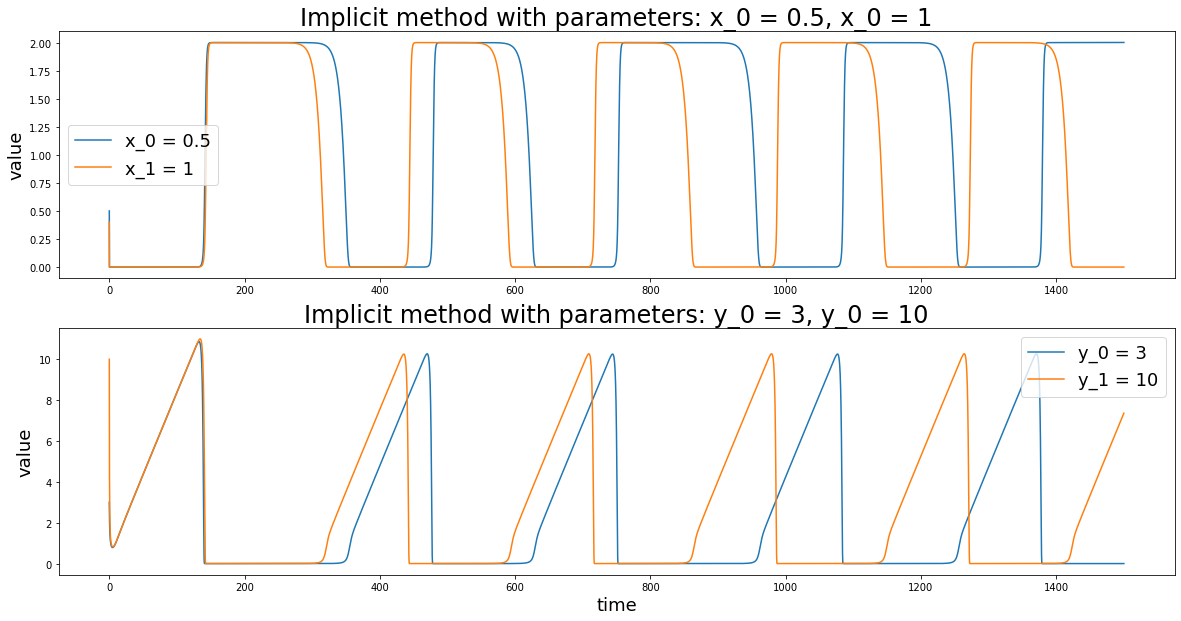

In [0]:
plt.figure(figsize=(19,10))

plt.subplot(2,1,1)
plt.plot(time, res[:, 0], label='x_0 = 0.5')
plt.plot(time, res_1[:, 0], label='x_1 = 1')
plt.legend(loc="best", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.title("Implicit method with parameters: x_0 = 0.5, x_0 = 1", fontsize = 24)

plt.subplot(2,1,2)
plt.plot(time, res[:, 1], label='y_0 = 3')
plt.plot(time, res_1[:, 1], label='y_1 = 10')
plt.legend(loc="best", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.title("Implicit method with parameters: y_0 = 3, y_0 = 10", fontsize = 24)

plt.show()

Теперь посмотрим на зависимость относительно $\alpha_0$ и $\varepsilon$:

In [0]:
initial_data = [0.5, 3 , 0.11]
res_2 = odeint(implicit, initial_data, time)
initial_data = [0.5, 3, 0.1]
res = odeint(implicit, initial_data, time)

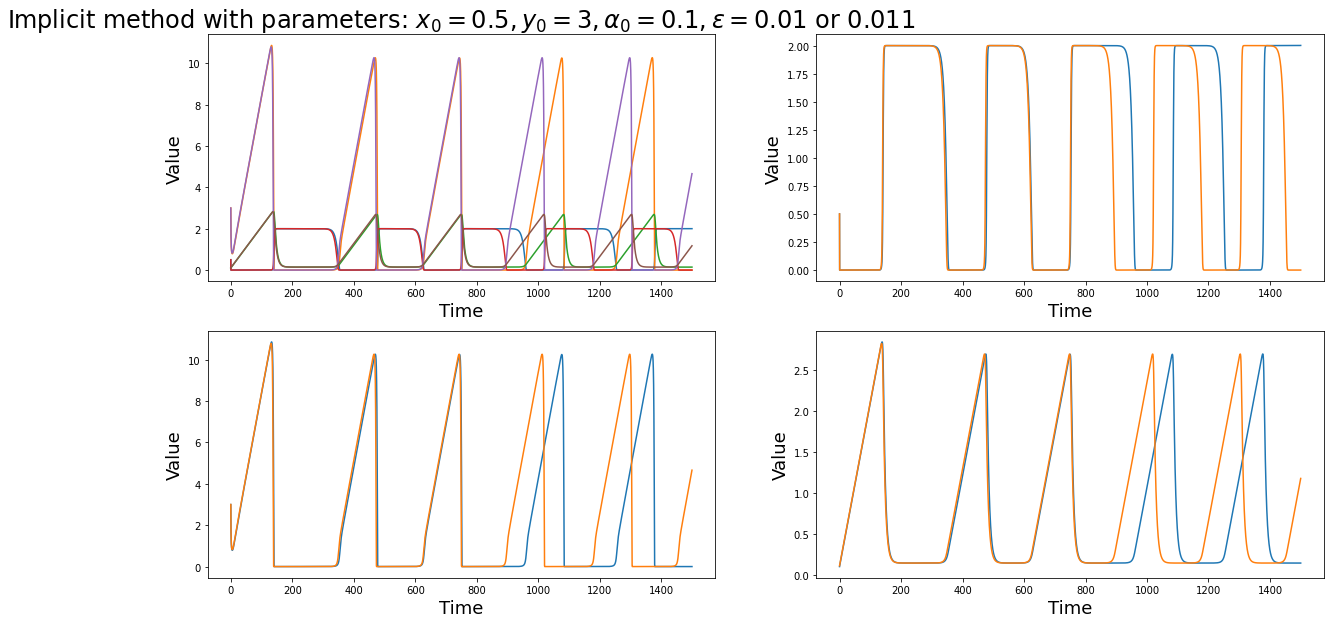

In [0]:
plt.figure(figsize=(19,10))


#plt.legend(loc="best", fontsize=18)
#plt.xlabel("Time", fontsize=18)
#plt.ylabel("Value", fontsize=18)
#plt.title("x_0 = 0.5, x_0 = 1")
plt.title(r"Implicit method with parameters: $x_0 = 0.5, y_0 = 3, \alpha_0 = 0.1, \varepsilon = 0.01$ or 0.011", fontsize = 24)


plt.subplot(2,2,1)
plt.plot(time, res[:, 0])
plt.plot(time, res[:, 1])
plt.plot(time, res[:, 2])
plt.plot(time, res_2[:, 0])
plt.plot(time, res_2[:, 1])
plt.plot(time, res_2[:, 2])
plt.xlabel("Time", fontsize=18)
plt.ylabel("Value", fontsize=18)



plt.subplot(2,2,2)
plt.plot(time, res[:, 0], label=r'$old$')
plt.plot(time, res_2[:, 0], label= r'$new$')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Value", fontsize=18)

plt.subplot(2,2,3)
plt.plot(time, res[:, 1], label=r'$old$')
plt.plot(time, res_2[:, 1], label= r'$new$')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Value", fontsize=18)

plt.subplot(2,2,4)
plt.plot(time, res[:, 2], label= r'$new$')
plt.plot(time, res_2[:, 2], label= r'$new$')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Value", fontsize=18)


plt.show()

По графику выше видно, что из-за изменения параматра $\alpha_0$ также фаза графика меняется на какой-то коэффициент.

In [0]:
def f(x, y, a, eps = 0.01):
    xdot = x * (1 - 0.5*x-2*y / (7 * a ** 2))
    ydot = y * (2 * a - 3.5 * (a ** 2) * x - 0.5 * y)
    adot = eps *(2 - 7 * a * x)
    return xdot, ydot, adot

In [0]:
def explicit(x, y, a, eps = 0.01):
    for i in range(0, num_h-2):
        a1 = f(x[i],y[i],a[i])
        a2 = f(x[i] + 0.5*h*a1[0],y[i]+ 0.5*h*a1[1], a[i]+0.5*h*a1[2])
        a3 = f(x[i] + 0.5*h*a2[0],y[i] + 0.5*h*a2[1],a[i] + 0.5*h *a2[2])
        a4 = f(x[i] + h*a3[0],y[i] + h*a3[1],a[i] + h*a3[2])
        x[i + 1] = x[i] + h/6*(a1[0] + 2*a2[0] + 2*a3[0] + a4[0])
        y[i + 1] = y[i] + h/6*(a1[1] + 2*a2[1] + 2*a3[1] + a4[1])
        a[i + 1] = a[i] + h/6*(a1[2] + 2*a2[2] + 2*a3[2]+a4[2])
    
    return x, y, a

In [0]:
T = 1500
h = 0.1
num_h = int(T/ h + 1)
x = np.zeros(num_h-1)
y = np.zeros_like(x)
a = np.zeros_like(x)
time = np.arange(0, T, h)
x[0] = 0.5
y[0] = 3
a[0] = 0.25
eps=0.01

In [0]:
x, y, a = explicit(x, y, a)

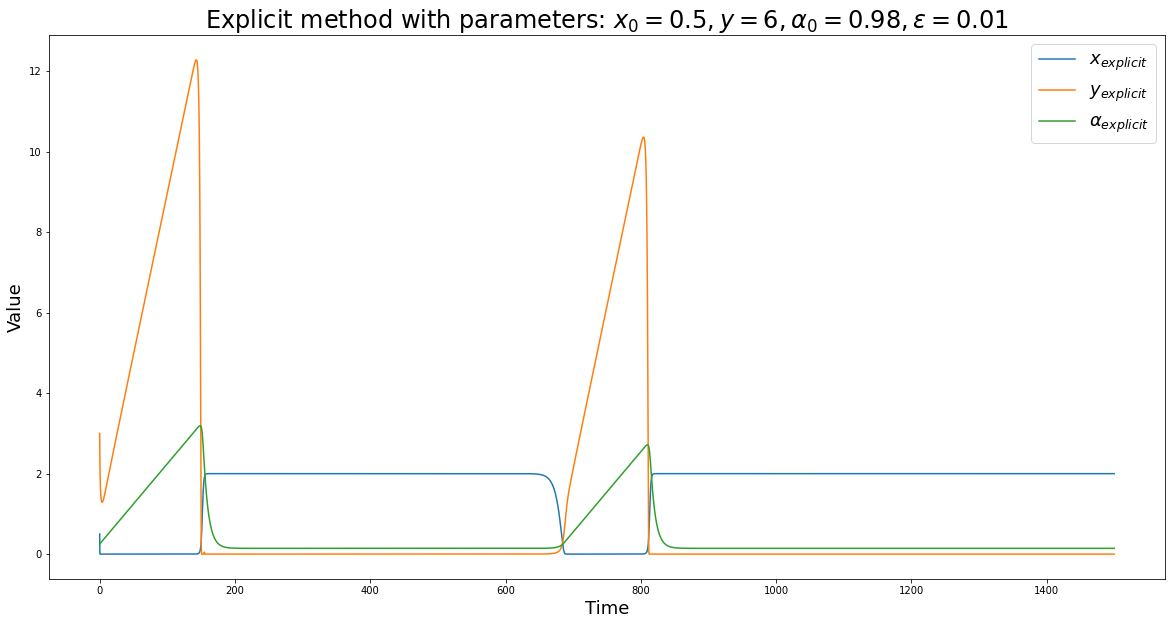

In [0]:
plt.figure(figsize=(19,10))
plt.plot(time, x, label = r"$x_{explicit}$")
plt.plot(time, y, label = r"$y_{explicit}$")
plt.plot(time, a, label = r"$\alpha_{explicit}$")
plt.legend(loc="best", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.title(r"Explicit method with parameters: $x_0 = 0.5, y = 6, \alpha_0 = 0.98, \varepsilon = 0.01$", fontsize = 24)
plt.show()